In [1]:
import pandas as pd
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# df = pd.read_csv("C:\\Users\\MAHE\\Desktop\\data_sets\\research_mit\\data.csv")
df = pd.read_csv('data.csv')
#data = pd.read_csv("C:\\Users\\MAHE\\Desktop\\data_sets\\research_mit\\updated_vals.csv")
df.head()

,Unnamed: 0,file_name,x,y,pressure,azimuth,elevation
0,0,0000f00.fpg,[1493. 1493. 1508. 1498. 1479. 1433. 1371. 130...,[8130. 8130. 8070. 7990. 7810. 7605. 7383. 720...,[ 312. 369. 458. 602. 685. 733. 757. 77...,[118. 116. 116. 116. 114. 114. 114. 110. 110. ...,[65. 66. 66. 66. 66. 66. 66. 66. 65. 64. 63. 6...
1,1,0000f01.fpg,[1395. 1410. 1410. 1415. 1415. 1415. 1408. 138...,[6452. 6502. 6516. 6521. 6482. 6415. 6273. 610...,[ 101. 176. 294. 423. 543. 620. 663. 69...,[111. 111. 111. 109. 109. 109. 109. 109. 109. ...,[61. 61. 61. 62. 62. 62. 62. 62. 62. 62. 62. 6...
2,2,0000f02.fpg,[1376. 1382. 1382. 1382. 1382. 1361. 1334. 129...,[4756. 4800. 4800. 4762. 4653. 4496. 4315. 412...,[ 146. 270. 396. 501. 589. 628. 640. 65...,[108. 108. 108. 108. 108. 108. 106. 105. 105. ...,[63. 63. 63. 63. 63. 63. 63. 62. 62. 62. 63. 6...
3,3,0000f03.fpg,[1449. 1449. 1449. 1464. 1443. 1415. 1368. 131...,[2892. 2892. 2892. 2848. 2774. 2630. 2483. 232...,[ 139. 233. 311. 386. 463. 492. 504. 51...,[110. 110. 113. 113. 113. 113. 113. 110. 110. ...,[66. 66. 65. 65. 65. 65. 65. 66. 66. 65. 65. 6...
4,4,0000f04.fpg,[1662. 1669. 1676. 1676. 1676. 1665. 1647. 161...,[1211. 1260. 1265. 1265. 1237. 1160. 1049. 89...,[ 44. 120. 207. 312. 351. 394. 430. 44...,[125. 125. 125. 124. 124. 124. 124. 125. 125. ...,[59. 59. 59. 60. 60. 60. 60. 60. 60. 62. 63. 6...


In [3]:
del(df['Unnamed: 0'])
df.columns = ['FileName','X','Y','Pressure','Azumith','PenElevation']

#  All 5 parameters are saved into a list (colnames). All the fpg file names are saved into a list (filenames).
colnames = list(df.columns)
filenames = list(df['FileName'])

## To clean the data which are stored in the cells as strings of improper format & convert into a proper organized list 
## which can be used for time series analysis.

def clean(t):
  bad = ['.', '\n', '[',']'] 
  t = ''.join(i for i in t if not i in bad) 
  t = t.split(' ')
  t = list(filter(None, t)) 
  t = [float(i) for i in t]
  return(t)
  
df = df.set_index([colnames[0]])
for i in range(1,6):
  df[colnames[i]] = df[colnames[i]].map(clean)

In [4]:
df.head()

,X,Y,Pressure,Azumith,PenElevation
FileName,,,,,
0000f00.fpg,"[1493.0, 1493.0, 1508.0, 1498.0, 1479.0, 1433....","[8130.0, 8130.0, 8070.0, 7990.0, 7810.0, 7605....","[312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...","[118.0, 116.0, 116.0, 116.0, 114.0, 114.0, 114...","[65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66...."
0000f01.fpg,"[1395.0, 1410.0, 1410.0, 1415.0, 1415.0, 1415....","[6452.0, 6502.0, 6516.0, 6521.0, 6482.0, 6415....","[101.0, 176.0, 294.0, 423.0, 543.0, 620.0, 663...","[111.0, 111.0, 111.0, 109.0, 109.0, 109.0, 109...","[61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62...."
0000f02.fpg,"[1376.0, 1382.0, 1382.0, 1382.0, 1382.0, 1361....","[4756.0, 4800.0, 4800.0, 4762.0, 4653.0, 4496....","[146.0, 270.0, 396.0, 501.0, 589.0, 628.0, 640...","[108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 106...","[63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62...."
0000f03.fpg,"[1449.0, 1449.0, 1449.0, 1464.0, 1443.0, 1415....","[2892.0, 2892.0, 2892.0, 2848.0, 2774.0, 2630....","[139.0, 233.0, 311.0, 386.0, 463.0, 492.0, 504...","[110.0, 110.0, 113.0, 113.0, 113.0, 113.0, 113...","[66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66...."
0000f04.fpg,"[1662.0, 1669.0, 1676.0, 1676.0, 1676.0, 1665....","[1211.0, 1260.0, 1265.0, 1265.0, 1237.0, 1160....","[44.0, 120.0, 207.0, 312.0, 351.0, 394.0, 430....","[125.0, 125.0, 125.0, 124.0, 124.0, 124.0, 124...","[59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60...."


In [5]:
# Creating a column of User number and sample number
# creating a column which contains the label (1/0 for verified and fake respectively)
UserNo =[]
SampleNo=[]
OP=[]
for ind in df.index:
    UserNo.append(ind[:4])
    SampleNo.append(ind[5:7])
    if(ind[4] == 'f'):
        OP.append(0)
    else:
        OP.append(1) 
df['UserNo'] = UserNo
df['SampleNo'] =SampleNo
df['OP']=OP
df.head()

,X,Y,Pressure,Azumith,PenElevation,UserNo,SampleNo,OP
FileName,,,,,,,,
0000f00.fpg,"[1493.0, 1493.0, 1508.0, 1498.0, 1479.0, 1433....","[8130.0, 8130.0, 8070.0, 7990.0, 7810.0, 7605....","[312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...","[118.0, 116.0, 116.0, 116.0, 114.0, 114.0, 114...","[65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66....",0000,00,0
0000f01.fpg,"[1395.0, 1410.0, 1410.0, 1415.0, 1415.0, 1415....","[6452.0, 6502.0, 6516.0, 6521.0, 6482.0, 6415....","[101.0, 176.0, 294.0, 423.0, 543.0, 620.0, 663...","[111.0, 111.0, 111.0, 109.0, 109.0, 109.0, 109...","[61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62....",0000,01,0
0000f02.fpg,"[1376.0, 1382.0, 1382.0, 1382.0, 1382.0, 1361....","[4756.0, 4800.0, 4800.0, 4762.0, 4653.0, 4496....","[146.0, 270.0, 396.0, 501.0, 589.0, 628.0, 640...","[108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 106...","[63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62....",0000,02,0
0000f03.fpg,"[1449.0, 1449.0, 1449.0, 1464.0, 1443.0, 1415....","[2892.0, 2892.0, 2892.0, 2848.0, 2774.0, 2630....","[139.0, 233.0, 311.0, 386.0, 463.0, 492.0, 504...","[110.0, 110.0, 113.0, 113.0, 113.0, 113.0, 113...","[66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66....",0000,03,0
0000f04.fpg,"[1662.0, 1669.0, 1676.0, 1676.0, 1676.0, 1665....","[1211.0, 1260.0, 1265.0, 1265.0, 1237.0, 1160....","[44.0, 120.0, 207.0, 312.0, 351.0, 394.0, 430....","[125.0, 125.0, 125.0, 124.0, 124.0, 124.0, 124...","[59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60....",0000,04,0


In [6]:
## Representing our large data in a more convenient and usable way - a dictionary.
## Dictionary = {Keys : Values} has been used to represent Dataset = {Filename : DataFrame of corresponding time series}.
## Each DataFrame represents one file & consists of 5 parameters each varying across time. The time series data can be accessed individually.
## Dictionary "data" contains all the time series data. Dictionary "auth" contains the fake/verified information as 0s as 1s.
"""data = {}
auth = {}
scaler = MinMaxScaler()
for timeseries in filenames:
  data[timeseries] = pd.DataFrame()
  auth[timeseries] = 0 if timeseries[4]=='f' else 1 
  for j in range(1,6):
    data[timeseries][colnames[j]] = df[colnames[j]][timeseries]
  offset = data[timeseries].min(axis = 0)[0:2]
  data[timeseries]['X'] -= offset[0] 
  data[timeseries]['Y'] -= offset[1] 
  data[timeseries][colnames[1:3]] = pd.DataFrame(scaler.fit_transform(data[timeseries][colnames[1:3]]), columns=colnames[1:3])
 """

"data = {}\nauth = {}\nscaler = MinMaxScaler()\nfor timeseries in filenames:\n  data[timeseries] = pd.DataFrame()\n  auth[timeseries] = 0 if timeseries[4]=='f' else 1 \n  for j in range(1,6):\n    data[timeseries][colnames[j]] = df[colnames[j]][timeseries]\n  offset = data[timeseries].min(axis = 0)[0:2]\n  data[timeseries]['X'] -= offset[0] \n  data[timeseries]['Y'] -= offset[1] \n  data[timeseries][colnames[1:3]] = pd.DataFrame(scaler.fit_transform(data[timeseries][colnames[1:3]]), columns=colnames[1:3])\n "

In [7]:
#This is code can be used to scale the values in each column
"""def scale_val(c,i):
    
    scaler = MinMaxScaler()
    l = c[i]
    l = np.asarray(l)
    c[i] = scaler.fit_transform(l.reshape(-1,1)).tolist()
for j in range(5000):
    scale_val(df.X,j)
    scale_val(df.Y,j)
    scale_val(df.Pressure,j)
    scale_val(df.Azumith,j)
    scale_val(df.PenElevation,j)"""

'def scale_val(c,i):\n    \n    scaler = MinMaxScaler()\n    l = c[i]\n    l = np.asarray(l)\n    c[i] = scaler.fit_transform(l.reshape(-1,1)).tolist()\nfor j in range(5000):\n    scale_val(df.X,j)\n    scale_val(df.Y,j)\n    scale_val(df.Pressure,j)\n    scale_val(df.Azumith,j)\n    scale_val(df.PenElevation,j)'

In [8]:
#Additonal column which might be useful are added to the data set
#x_len is the widhth of the signature
#y_len is the Height of the signature
#avg_ps is the average pressure applied throughout the signature
#xy_ratio is width/heigth
#pen_up is the number of times there has been zero pressure in the signature
#DifPenEl is the distinct values of pen elevation
#DifAz is the distinct value of azumith
x_len = []
y_len = []
avg_ps = []
xy_ratio = []
pen_up =[]
DifPenEl = []
DifAz =[]
cartesian_length=[]
for i in range(5000):
    x_len.append(max(df.X[i])-min(df.X[i]))
    y_len.append(max(df.Y[i])-min(df.Y[i]))
    cartesian_length.append(((max(df.X[i])-min(df.X[i]))**2 + (max(df.Y[i])-min(df.Y[i]))**2)**(1/2))
    avg_ps.append(mean(df.Pressure[i]))
    xy_ratio.append((max(df.X[i])-min(df.X[i]))/(max(df.Y[i])-min(df.Y[i])))
    pen_up.append(df.Pressure[i].count(0))
    DifPenEl.append(len(set(df.PenElevation[i])))
    DifAz.append(len(set(df.Azumith[i])))
df['x_len'] = x_len
df['y_len'] = y_len
df['cartesian_length'] = cartesian_length
df['avg_ps'] = avg_ps
df['ratio'] = xy_ratio
df['difpen'] = DifPenEl
df['DifAz'] = DifAz
df['pen_up'] = pen_up

In [9]:
#df.to_csv("updated.csv")
#for i in range(4950,5000):
    #print(i," ",(max(df.X[i])-min(df.X[i]))/(max(df.Y[i])-min(df.Y[i]))," ",len(set(df.Pressure[i])))
    #print((df.PenElevation[i].count(0)))

In [10]:
df.head(30)

,X,Y,Pressure,Azumith,PenElevation,UserNo,SampleNo,OP,x_len,y_len,cartesian_length,avg_ps,ratio,difpen,DifAz,pen_up
FileName,,,,,,,,,,,,,,,,
0000f00.fpg,"[1493.0, 1493.0, 1508.0, 1498.0, 1479.0, 1433....","[8130.0, 8130.0, 8070.0, 7990.0, 7810.0, 7605....","[312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...","[118.0, 116.0, 116.0, 116.0, 114.0, 114.0, 114...","[65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66....",0000,00,0,3005.0,1586.0,3397.855353,962.108911,1.894704,10,28,0
0000f01.fpg,"[1395.0, 1410.0, 1410.0, 1415.0, 1415.0, 1415....","[6452.0, 6502.0, 6516.0, 6521.0, 6482.0, 6415....","[101.0, 176.0, 294.0, 423.0, 543.0, 620.0, 663...","[111.0, 111.0, 111.0, 109.0, 109.0, 109.0, 109...","[61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62....",0000,01,0,2538.0,1373.0,2885.580184,938.732673,1.848507,7,27,0
0000f02.fpg,"[1376.0, 1382.0, 1382.0, 1382.0, 1382.0, 1361....","[4756.0, 4800.0, 4800.0, 4762.0, 4653.0, 4496....","[146.0, 270.0, 396.0, 501.0, 589.0, 628.0, 640...","[108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 106...","[63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62....",0000,02,0,2005.0,1481.0,2492.666444,947.141593,1.353815,6,24,0
0000f03.fpg,"[1449.0, 1449.0, 1449.0, 1464.0, 1443.0, 1415....","[2892.0, 2892.0, 2892.0, 2848.0, 2774.0, 2630....","[139.0, 233.0, 311.0, 386.0, 463.0, 492.0, 504...","[110.0, 110.0, 113.0, 113.0, 113.0, 113.0, 113...","[66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66....",0000,03,0,2210.0,1434.0,2634.474521,899.801802,1.541144,9,22,0
0000f04.fpg,"[1662.0, 1669.0, 1676.0, 1676.0, 1676.0, 1665....","[1211.0, 1260.0, 1265.0, 1265.0, 1237.0, 1160....","[44.0, 120.0, 207.0, 312.0, 351.0, 394.0, 430....","[125.0, 125.0, 125.0, 124.0, 124.0, 124.0, 124...","[59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60....",0000,04,0,2136.0,1469.0,2592.384424,900.307087,1.454050,13,39,0
0000f05.fpg,"[6341.0, 6374.0, 6374.0, 6355.0, 6288.0, 6191....","[8526.0, 8555.0, 8538.0, 8504.0, 8435.0, 8350....","[22.0, 48.0, 85.0, 112.0, 131.0, 170.0, 173.0,...","[165.0, 165.0, 165.0, 165.0, 165.0, 167.0, 167...","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....",0000,05,0,2485.0,1314.0,2811.017787,408.648649,1.891172,5,14,0
0000f06.fpg,"[6393.0, 6509.0, 6542.0, 6542.0, 6562.0, 6542....","[6801.0, 6876.0, 6931.0, 6931.0, 6962.0, 6957....","[61.0, 50.0, 53.0, 88.0, 90.0, 107.0, 148.0, 1...","[160.0, 160.0, 160.0, 161.0, 161.0, 161.0, 161...","[54.0, 55.0, 55.0, 57.0, 57.0, 57.0, 57.0, 57....",0000,06,0,2538.0,1498.0,2947.108413,340.175258,1.694259,7,24,0
0000f07.fpg,"[6143.0, 6191.0, 6191.0, 6196.0, 6196.0, 6196....","[4927.0, 4976.0, 5004.0, 5010.0, 5010.0, 5010....","[24.0, 48.0, 54.0, 67.0, 80.0, 110.0, 132.0, 1...","[154.0, 154.0, 156.0, 156.0, 158.0, 158.0, 158...","[57.0, 56.0, 57.0, 57.0, 56.0, 56.0, 56.0, 55....",0000,07,0,2444.0,1402.0,2817.576973,298.831933,1.743224,6,19,3
0000f08.fpg,"[6534.0, 6356.0, 6212.0, 6047.0, 5882.0, 5730....","[3258.0, 3129.0, 3000.0, 2846.0, 2674.0, 2583....","[25.0, 44.0, 53.0, 54.0, 47.0, 142.0, 209.0, 2...","[156.0, 156.0, 158.0, 157.0, 157.0, 156.0, 154...","[53.0, 53.0, 53.0, 54.0, 54.0, 55.0, 55.0, 57....",0000,08,0,2459.0,1329.0,2795.160461,293.774194,1.850263,8,17,0


In [11]:
#imports for Model Creation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df[['UserNo','avg_ps','ratio','pen_up','difpen']] ,df['OP'] ,test_size = 0.25,random_state = 4)

### RandomForest Classifier

In [13]:
#randomforest
rfc = RandomForestClassifier(n_estimators=14)
rfc.fit(x_train,y_train)
rfcpred = rfc.predict(x_test)
(metrics.accuracy_score(rfc.predict(x_test),y_test))

0.824

In [14]:
confusion_matrix(y_test, rfcpred)

array([[515, 114],
       [106, 515]])

In [15]:
#SVM Model
sm = SVC()
sm.fit(x_train,y_train)
pred_svm = sm.predict(x_test)
#metrics.accuracy_score(sm.predict(x_test),y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
df2 = df.copy()

In [17]:
df2

,X,Y,Pressure,Azumith,PenElevation,UserNo,SampleNo,OP,x_len,y_len,cartesian_length,avg_ps,ratio,difpen,DifAz,pen_up
FileName,,,,,,,,,,,,,,,,
0000f00.fpg,"[1493.0, 1493.0, 1508.0, 1498.0, 1479.0, 1433....","[8130.0, 8130.0, 8070.0, 7990.0, 7810.0, 7605....","[312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...","[118.0, 116.0, 116.0, 116.0, 114.0, 114.0, 114...","[65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66....",0000,00,0,3005.0,1586.0,3397.855353,962.108911,1.894704,10,28,0
0000f01.fpg,"[1395.0, 1410.0, 1410.0, 1415.0, 1415.0, 1415....","[6452.0, 6502.0, 6516.0, 6521.0, 6482.0, 6415....","[101.0, 176.0, 294.0, 423.0, 543.0, 620.0, 663...","[111.0, 111.0, 111.0, 109.0, 109.0, 109.0, 109...","[61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62....",0000,01,0,2538.0,1373.0,2885.580184,938.732673,1.848507,7,27,0
0000f02.fpg,"[1376.0, 1382.0, 1382.0, 1382.0, 1382.0, 1361....","[4756.0, 4800.0, 4800.0, 4762.0, 4653.0, 4496....","[146.0, 270.0, 396.0, 501.0, 589.0, 628.0, 640...","[108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 106...","[63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62....",0000,02,0,2005.0,1481.0,2492.666444,947.141593,1.353815,6,24,0
0000f03.fpg,"[1449.0, 1449.0, 1449.0, 1464.0, 1443.0, 1415....","[2892.0, 2892.0, 2892.0, 2848.0, 2774.0, 2630....","[139.0, 233.0, 311.0, 386.0, 463.0, 492.0, 504...","[110.0, 110.0, 113.0, 113.0, 113.0, 113.0, 113...","[66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66....",0000,03,0,2210.0,1434.0,2634.474521,899.801802,1.541144,9,22,0
0000f04.fpg,"[1662.0, 1669.0, 1676.0, 1676.0, 1676.0, 1665....","[1211.0, 1260.0, 1265.0, 1265.0, 1237.0, 1160....","[44.0, 120.0, 207.0, 312.0, 351.0, 394.0, 430....","[125.0, 125.0, 125.0, 124.0, 124.0, 124.0, 124...","[59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60....",0000,04,0,2136.0,1469.0,2592.384424,900.307087,1.454050,13,39,0
0000f05.fpg,"[6341.0, 6374.0, 6374.0, 6355.0, 6288.0, 6191....","[8526.0, 8555.0, 8538.0, 8504.0, 8435.0, 8350....","[22.0, 48.0, 85.0, 112.0, 131.0, 170.0, 173.0,...","[165.0, 165.0, 165.0, 165.0, 165.0, 167.0, 167...","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....",0000,05,0,2485.0,1314.0,2811.017787,408.648649,1.891172,5,14,0
0000f06.fpg,"[6393.0, 6509.0, 6542.0, 6542.0, 6562.0, 6542....","[6801.0, 6876.0, 6931.0, 6931.0, 6962.0, 6957....","[61.0, 50.0, 53.0, 88.0, 90.0, 107.0, 148.0, 1...","[160.0, 160.0, 160.0, 161.0, 161.0, 161.0, 161...","[54.0, 55.0, 55.0, 57.0, 57.0, 57.0, 57.0, 57....",0000,06,0,2538.0,1498.0,2947.108413,340.175258,1.694259,7,24,0
0000f07.fpg,"[6143.0, 6191.0, 6191.0, 6196.0, 6196.0, 6196....","[4927.0, 4976.0, 5004.0, 5010.0, 5010.0, 5010....","[24.0, 48.0, 54.0, 67.0, 80.0, 110.0, 132.0, 1...","[154.0, 154.0, 156.0, 156.0, 158.0, 158.0, 158...","[57.0, 56.0, 57.0, 57.0, 56.0, 56.0, 56.0, 55....",0000,07,0,2444.0,1402.0,2817.576973,298.831933,1.743224,6,19,3
0000f08.fpg,"[6534.0, 6356.0, 6212.0, 6047.0, 5882.0, 5730....","[3258.0, 3129.0, 3000.0, 2846.0, 2674.0, 2583....","[25.0, 44.0, 53.0, 54.0, 47.0, 142.0, 209.0, 2...","[156.0, 156.0, 158.0, 157.0, 157.0, 156.0, 154...","[53.0, 53.0, 53.0, 54.0, 54.0, 55.0, 55.0, 57....",0000,08,0,2459.0,1329.0,2795.160461,293.774194,1.850263,8,17,0


In [18]:
# Removing pen elevation parameter

# df2 = df2.drop('PenElevation', 1)
print(max(df2['x_len']))
print(min(df2['x_len']))
df2.loc[df2.cartesian_length == min(df2['cartesian_length'])]

6678.0
178.0


,X,Y,Pressure,Azumith,PenElevation,UserNo,SampleNo,OP,x_len,y_len,cartesian_length,avg_ps,ratio,difpen,DifAz,pen_up
FileName,,,,,,,,,,,,,,,,
0042f13.fpg,"[9640.0, 9653.0, 9653.0, 9708.0, 9793.0, 9849.0]","[2820.0, 2867.0, 2875.0, 2793.0, 2741.0, 2677.0]","[34.0, 30.0, 32.0, 845.0, 720.0, 160.0]","[149.0, 150.0, 152.0, 110.0, 110.0, 114.0]","[63.0, 62.0, 62.0, 65.0, 66.0, 66.0]",0042,13,0,209.0,198.0,287.897551,303.5,1.055556,4,5,0


In [32]:
df['X'][0]

[1493.0,
 1493.0,
 1508.0,
 1498.0,
 1479.0,
 1433.0,
 1371.0,
 1309.0,
 1257.0,
 1223.0,
 1199.0,
 1187.0,
 1182.0,
 1182.0,
 1210.0,
 1248.0,
 1294.0,
 1343.0,
 1393.0,
 1440.0,
 1491.0,
 1544.0,
 1605.0,
 1678.0,
 1771.0,
 1872.0,
 1922.0,
 1940.0,
 1940.0,
 1883.0,
 1811.0,
 1727.0,
 1668.0,
 1652.0,
 1665.0,
 1703.0,
 1743.0,
 1803.0,
 1874.0,
 1967.0,
 2048.0,
 2121.0,
 2199.0,
 2280.0,
 2335.0,
 2372.0,
 2372.0,
 2364.0,
 2344.0,
 2297.0,
 2251.0,
 2171.0,
 2069.0,
 1931.0,
 1742.0,
 1518.0,
 1290.0,
 1063.0,
 837.0,
 728.0,
 708.0,
 748.0,
 874.0,
 1077.0,
 1332.0,
 1595.0,
 1886.0,
 2195.0,
 2406.0,
 2550.0,
 2649.0,
 2644.0,
 2552.0,
 2401.0,
 2122.0,
 1749.0,
 1314.0,
 906.0,
 601.0,
 365.0,
 346.0,
 507.0,
 787.0,
 1252.0,
 1788.0,
 2372.0,
 2890.0,
 3192.0,
 3351.0,
 3328.0,
 3170.0,
 2921.0,
 2553.0,
 2271.0,
 2047.0,
 2047.0,
 2165.0,
 2366.0,
 2665.0,
 2961.0,
 3255.0]

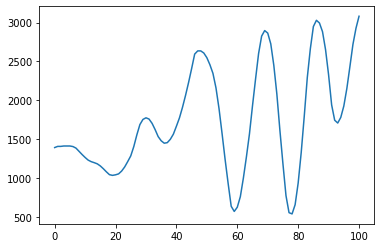

In [37]:
plt.plot(np.arange(0,len(df['Pressure'][1])), df['X'][1])


In [20]:
resampled = (df.set_index(pd.date_range(start='1/1/1991' ,periods=len(df), end='1/1/2000'))
               .resample('33D').mean().interpolate())